In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys
from IPython.core.pylabtools import figsize

# Datos históricos

In [2]:
pathAPI = os.getcwd()
pathData = os.path.join(pathAPI,'data')

In [3]:
# API URL Compound, https://compound.finance/docs/api#MarketHistoryService
urlcomp = 'https://api.compound.finance/api/v2/market_history/graph'

In [4]:
#Assets
cETH = '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5'
cSAI = '0xf5dce57282a584d2746faf1593d3121fcac444dc'
cDAI = '0x5d3a536e4d6dbd6114cc1ead35777bab948e3643'
cUSDC = '0x39aa39c021dfbae8fac545936693ac917d5e7563'
cBAT = '0x6c8c6b02e7b2be14d4fa6022dfd6d75921d90e4e'

In [5]:
#Time Frame
startT='19-10-01 00:00:00'
endT='21-03-27 00:00:00'
startT=datetime.strptime(startT, '%y-%m-%d %H:%M:%S')
endT=datetime.strptime(endT, '%y-%m-%d %H:%M:%S')

In [6]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cETH,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

params

{'asset': '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5',
 'min_block_timestamp': 1569906000,
 'max_block_timestamp': 1616821200,
 'num_buckets': 543}

In [7]:
response = requests.get(urlcomp,params)
cethHD = response.json()

#Save Data
# f = open(os.path.join(pathData,'cETH_daily.pickle'), 'wb')
# pickle.dump(cethHD, f,-1)          
# f.close()

In [8]:
#Load Downloaded Data
# f = open(os.path.join(pathData,'cETH_daily.pickle'), 'rb')
# cethHD = pickle.load(f)     
#  f.close()

In [9]:
cethHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [10]:
# Retrive data

# Tasas
# Borrow Rate
BorR = json_normalize(cethHD['borrow_rates'],sep="_")
BorR['rate'] = BorR['rate'].astype(float)
BorR.index = pd.to_datetime(BorR['block_timestamp'], unit='s')
BorR = BorR.rate

# Supply Rate
SupR = json_normalize(cethHD['supply_rates'],sep="_")
SupR['rate'] = SupR['rate'].astype(float)
SupR.index = pd.to_datetime(SupR['block_timestamp'], unit='s')
SupR = SupR.rate

# Tasa de utilización
UtiR = pd.Series((SupR.values/(BorR.values*(1-0.3))),index=BorR.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSup = json_normalize(cethHD['total_supply_history'],sep="_")
TSup['total_value'] = TSup['total_value'].astype(float)
TSup.index = pd.to_datetime(TSup['block_timestamp'], unit='s')
TSup = TSup.total_value

# Total Borrow
TBor = json_normalize(cethHD['total_borrows_history'],sep="_")
TBor['total_value'] = TBor['total_value'].astype(float)
TBor.index = pd.to_datetime(TBor['block_timestamp'], unit='s')
TBor = TBor.total_value

# Otros

# ExchangeRate
Xrate = json_normalize(cethHD['exchange_rates'],sep="_")
Xrate['rate'] = Xrate['rate'].astype(float)
Xrate.index = pd.to_datetime(Xrate['block_timestamp'], unit='s')
Xrate = Xrate.rate

# Precio
PUSD = json_normalize(cethHD['prices_usd'],sep="_")
PUSD['price_value'] = PUSD['price_value'].astype(float)
PUSD.index = pd.to_datetime(PUSD['block_timestamp'], unit='s')
PUSD = PUSD.price_value

<ipython-input-10-d1821c2af7fd>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorR = json_normalize(cethHD['borrow_rates'],sep="_")
<ipython-input-10-d1821c2af7fd>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupR = json_normalize(cethHD['supply_rates'],sep="_")
<ipython-input-10-d1821c2af7fd>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSup = json_normalize(cethHD['total_supply_history'],sep="_")
<ipython-input-10-d1821c2af7fd>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBor = json_normalize(cethHD['total_borrows_history'],sep="_")
<ipython-input-10-d1821c2af7fd>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  Xrate = json_normalize(cethHD['exchange_rates'],sep="_")
<ipython-input-10-d1821c2af7fd>:42: FutureWarning: 

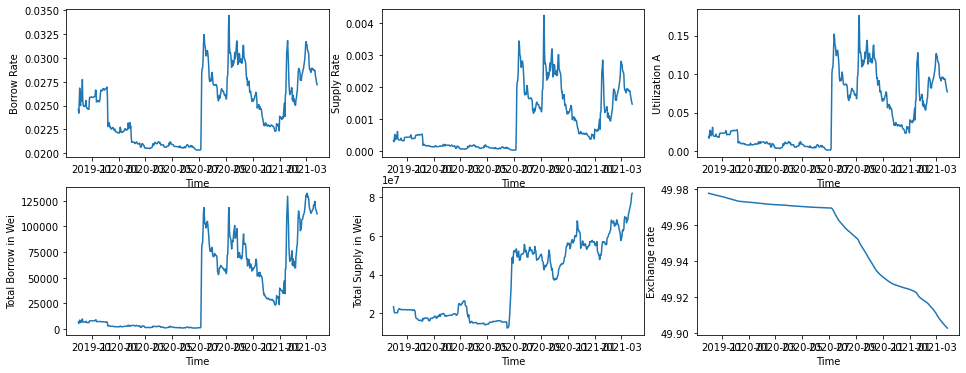

In [11]:
figsize(16,6)

plt.subplot(2,3,1)
plt.plot(BorR)
plt.xlabel('Time')
plt.ylabel('Borrow Rate')

plt.subplot(2,3,2)
plt.plot(SupR)
plt.xlabel('Time')
plt.ylabel('Supply Rate')

plt.subplot(2,3,3)
plt.plot(SupR.index, UtiR)
plt.xlabel('Time')
plt.ylabel('Utilization A')

plt.subplot(2,3,4)
plt.plot(TBor)
plt.xlabel('Time')
plt.ylabel('Total Borrow in Wei')

plt.subplot(2,3,5)
plt.plot(TSup)
plt.xlabel('Time')
plt.ylabel('Total Supply in Wei')

plt.subplot(2,3,6)
plt.plot(1/Xrate)
plt.xlabel('Time')
plt.ylabel('Exchange rate')

# plt.subplot(2,3,7)
# plt.plot(PUSD)
# plt.xlabel('Time')
# plt.ylabel('Price of ETH in USD')
plt.show()

In [12]:
# Uta[Uta.index<'2020-07-15'].describe()
# Uta[Uta.index>'2020-07-15'].describe()
UtiR[UtiR.index].describe()

count    543.000000
mean       0.045895
std        0.042583
min        0.001490
25%        0.009309
50%        0.026588
75%        0.081041
max        0.176201
dtype: float64

In [13]:
PUSD[PUSD.index>'2020-03-15'].head()

block_timestamp
2020-03-15 04:59:56    200.044098
2020-03-16 04:59:56    201.405478
2020-03-17 04:59:56    190.840998
2020-03-18 04:59:56    132.542323
2020-03-19 04:59:56    127.593212
Name: price_value, dtype: float64

# Reglas del modelo Hurricane

In [14]:
# Datos
br = list(cethHD["borrow_rates"])
sr = list(cethHD["supply_rates"])
er = list(cethHD["exchange_rates"])
pr = list(cethHD["prices_usd"])
tb = list(cethHD["total_borrows_history"])
ts = list(cethHD["total_supply_history"])

# A listas
BR = []; SR = []
BL = []; ER = []; PR = []
TB = []; TS = []

for i in range(len(br)):
    BR.append(br[i]["rate"])
    SR.append(sr[i]["rate"])
    BL.append(br[i]["block_number"]) # block_timestamp | block_number
    ER.append(er[i]["rate"])
    PR.append(float(pr[i]["price"]["value"]))
    TB.append(float(tb[i]["total"]["value"]))
    TS.append(float(ts[i]["total"]["value"]))

In [15]:
# Estimaciones
blocksPerYear = 2*60*24*365
RF = 0.2

# Tasa de utilización estimada a partir de las tasas reportadas
UT = []
for r in range(len(BR)):
    UT.append(SR[r]/(BR[r]*(1-0.2)))

# Tasa de utilización estimada a partir de las cantidades en TB y TS
EUT = []
for v in range(len(TB)):
    if TB[v] != 0:
        EUT.append(TB[v]/(TS[v]*ER[v]))
    else:
        EUT.append(0)

# Métrica de espacio entre acciones
blockDelta = [0]
for b in range(1,len(BL)):
    blockDelta.append(BL[b] - BL[b-1])

# Total de reservas estimado (Compound)
TR = [0]
for a in range(1,len(TB)):
    newTR = TR[a-1] + TB[a]*blockDelta[a]*BR[a]*RF/blocksPerYear
    TR.append(newTR)

# Cash estimado
C = [TS[0]*0.02 - TB[0]]

for d in range(1,len(TS)):
    C.append(C[d-1] - (TB[d] - TB[d-1]) + TR[d] + (TS[d] - TS[d-1])*ER[d-1])

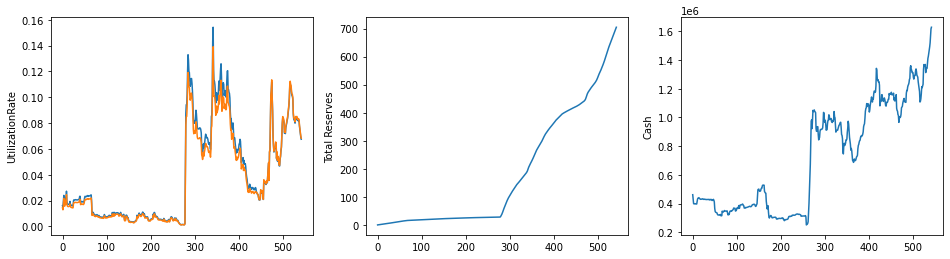

In [16]:
figsize(16,4)

plt.subplot(1,3,1)
plt.plot(UT)
plt.plot(EUT)
plt.ylabel('UtilizationRate')

plt.subplot(1,3,2)
plt.plot(TR)
plt.ylabel('Total Reserves')

plt.subplot(1,3,3)
plt.plot(C)
plt.ylabel('Cash')

plt.show()

In [99]:
# Modelo Hurricane

def tropyBR(utilizationRate):
    return utilizationRate*0.04 + 0.08

def tropySR(utilizationRate):
    return utilizationRate*0.02 + 0.03

# Tasas del modelo Hurricane
tBR = []; tSR = []

for rate in EUT:
    tBR.append(tropyBR(rate))
    tSR.append(tropySR(rate))

# Reservas del modelo Hurricane
tTR = [0]

for r in range(1,len(EUT)):
    if EUT[r] > 0.5962912017836259: # Tasa tomada de https://colab.research.google.com/drive/1_AX8r-_nojJTHPnCBEUHgrN_IlVkRNe0?authuser=1#scrollTo=zgX16XHfRiNN
        rf = (EUT[r]*tBR[r] - tSR[r]) # ReserveFactor variable
        newTR = tTR[r-1] + rf*TB[r]*blockDelta[r]*tBR[r]/blocksPerYear
    else:
        newTR = tTR[r-1]
    tTR.append(newTR)

# Intereses prometidos
promises = [0]

for a in range(1,len(C)):
    promises.append(C[a-1]*tSR[a-1]*blockDelta[a]/blocksPerYear)

# Intereses generados por las deudas
interestPerBorrows = [0]

for a in range(1,len(TB)):
    interestPerBorrows.append(TB[a-1]*tBR[a-1]*blockDelta[a]/blocksPerYear)

# Lo que sale del fondo
subsidy = [5000000000] # Tamaño inicial del fondo

for a in range(1,len(promises)):
    subsidy.append(subsidy[a-1] - max(0,promises[a] - interestPerBorrows[a]))

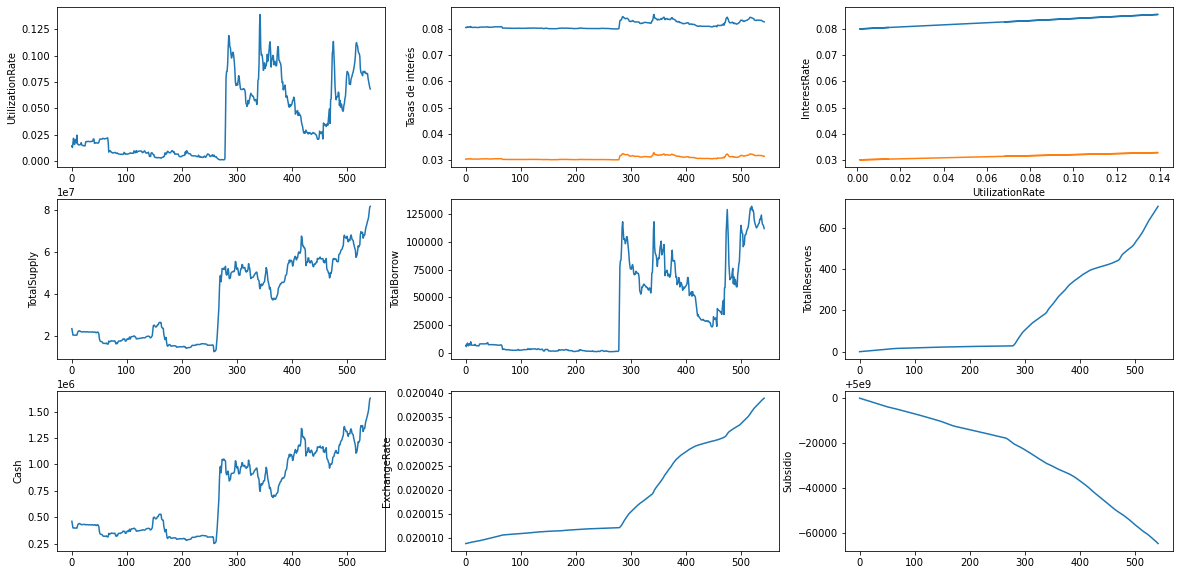

In [100]:
figsize(20,10)
n = 543 # total = 543

plt.subplot(3,3,1)
plt.plot(EUT[:n])
plt.ylabel('UtilizationRate')

plt.subplot(3,3,2)
plt.plot(tBR[:n])
plt.plot(tSR[:n])
plt.ylabel('Tasas de interés')

plt.subplot(3,3,3)
plt.plot(EUT[:n],tBR[:n])
plt.plot(EUT[:n],tSR[:n])
plt.xlabel('UtilizationRate')
plt.ylabel('InterestRate')

plt.subplot(3,3,4)
plt.plot(TS[:n])
plt.ylabel('TotalSupply')

plt.subplot(3,3,5)
plt.plot(TB[:n])
plt.ylabel('TotalBorrow')

plt.subplot(3,3,6)
plt.plot(TR[:n])
plt.ylabel('TotalReserves')

plt.subplot(3,3,7)
plt.plot(C[:n])
plt.ylabel('Cash')

plt.subplot(3,3,8)
plt.plot(ER[:n])
plt.ylabel('ExchangeRate')

plt.subplot(3,3,9)
plt.plot(subsidy[:n])
plt.ylabel('Subsidio')

plt.show()

In [101]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cDAI,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

params

{'asset': '0x5d3a536e4d6dbd6114cc1ead35777bab948e3643',
 'min_block_timestamp': 1569906000,
 'max_block_timestamp': 1616821200,
 'num_buckets': 543}

In [102]:
response = requests.get(urlcomp,params)
cdaiHD = response.json()

In [103]:
cdaiHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [104]:
# Retrive data

# Tasas
# Borrow Rate
BorRD = json_normalize(cdaiHD['borrow_rates'],sep="_")
BorRD['rate'] = BorRD['rate'].astype(float)
BorRD.index = pd.to_datetime(BorRD['block_timestamp'], unit='s')
BorRD = BorRD.rate

# Supply Rate
SupRD = json_normalize(cdaiHD['supply_rates'],sep="_")
SupRD['rate'] = SupRD['rate'].astype(float)
SupRD.index = pd.to_datetime(SupRD['block_timestamp'], unit='s')
SupRD = SupRD.rate

# Tasa de utilización
UtiRD = pd.Series((SupRD.values/(BorRD.values*(1-0.2))),index=BorRD.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSupD = json_normalize(cdaiHD['total_supply_history'],sep="_")
TSupD['total_value'] = TSupD['total_value'].astype(float)
TSupD.index = pd.to_datetime(TSupD['block_timestamp'], unit='s')
TSupD = TSupD.total_value

# Total Borrow
TBorD = json_normalize(cdaiHD['total_borrows_history'],sep="_")
TBorD['total_value'] = TBorD['total_value'].astype(float)
TBorD.index = pd.to_datetime(TBorD['block_timestamp'], unit='s')
TBorD = TBorD.total_value

# Otros

# ExchangeRate
XrateD = json_normalize(cdaiHD['exchange_rates'],sep="_")
XrateD['rate'] = XrateD['rate'].astype(float)
XrateD.index = pd.to_datetime(XrateD['block_timestamp'], unit='s')
XrateD = XrateD.rate

# Precio
PUSDD = json_normalize(cdaiHD['prices_usd'],sep="_")
PUSDD['price_value'] = PUSDD['price_value'].astype(float)
PUSDD.index = pd.to_datetime(PUSDD['block_timestamp'], unit='s')
PUSDD = PUSDD.price_value

<ipython-input-104-47239a6bd394>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRD = json_normalize(cdaiHD['borrow_rates'],sep="_")
<ipython-input-104-47239a6bd394>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupRD = json_normalize(cdaiHD['supply_rates'],sep="_")
<ipython-input-104-47239a6bd394>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSupD = json_normalize(cdaiHD['total_supply_history'],sep="_")
<ipython-input-104-47239a6bd394>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBorD = json_normalize(cdaiHD['total_borrows_history'],sep="_")
<ipython-input-104-47239a6bd394>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  XrateD = json_normalize(cdaiHD['exchange_rates'],sep="_")
<ipython-input-104-47239a6bd394>:42: Futu

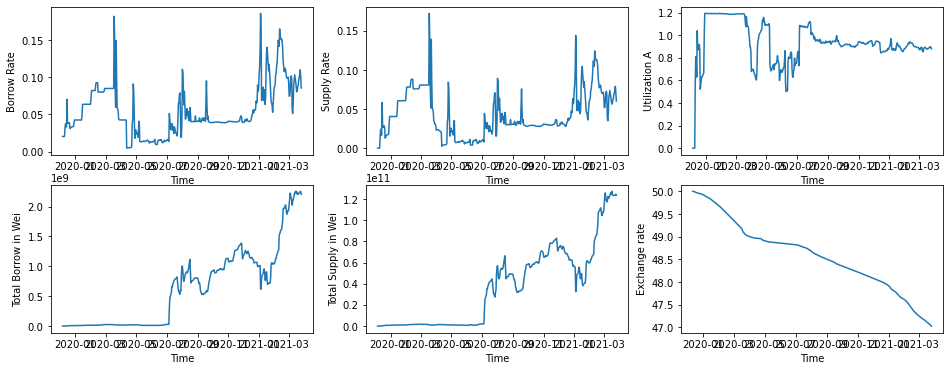

In [105]:
figsize(16,6)

plt.subplot(2,3,1)
plt.plot(BorRD)
plt.xlabel('Time')
plt.ylabel('Borrow Rate')

plt.subplot(2,3,2)
plt.plot(SupRD)
plt.xlabel('Time')
plt.ylabel('Supply Rate')

plt.subplot(2,3,3)
plt.plot(SupRD.index, UtiRD)
plt.xlabel('Time')
plt.ylabel('Utilization A')

plt.subplot(2,3,4)
plt.plot(TBorD)
plt.xlabel('Time')
plt.ylabel('Total Borrow in Wei')

plt.subplot(2,3,5)
plt.plot(TSupD)
plt.xlabel('Time')
plt.ylabel('Total Supply in Wei')

plt.subplot(2,3,6)
plt.plot(1/XrateD)
plt.xlabel('Time')
plt.ylabel('Exchange rate')

# plt.subplot(2,3,7)
# plt.plot(PUSD)
# plt.xlabel('Time')
# plt.ylabel('Price of ETH in USD')
plt.show()

In [106]:
# Datos
brd = list(cdaiHD["borrow_rates"])
srd = list(cdaiHD["supply_rates"])
erd = list(cdaiHD["exchange_rates"])
prd = list(cdaiHD["prices_usd"])
tbd = list(cdaiHD["total_borrows_history"])
tsd = list(cdaiHD["total_supply_history"])

# A listas
BRD = []; SRD = []
BLD = []; ERD = []; PRD = []
TBD = []; TSD = []

for i in range(len(brd)):
    BRD.append(brd[i]["rate"])
    SRD.append(srd[i]["rate"])
    BLD.append(brd[i]["block_number"]) # block_timestamp | block_number
    ERD.append(erd[i]["rate"])
    PRD.append(float(prd[i]["price"]["value"]))
    TBD.append(float(tbd[i]["total"]["value"]))
    TSD.append(float(tsd[i]["total"]["value"]))

In [107]:
# Estimaciones
blocksPerYear = 2*60*24*365
RFd = 0.2

# Tasa de utilización estimada a partir de las tasas reportadas
UTD = []
for r in range(len(BRD)):
    UTD.append(SRD[r]/(BRD[r]*(1-0.2)))

# Tasa de utilización estimada a partir de las cantidades en TB y TS
EUTD = []
for v in range(len(TBD)):
    if TBD[v] != 0:
        EUTD.append(TBD[v]/(TSD[v]*ERD[v]))
    else:
        EUTD.append(0)

# Métrica de espacio entre acciones
blockDeltad = [0]
for b in range(1,len(BLD)):
    blockDeltad.append(BLD[b] - BLD[b-1])

# Total de reservas estimado (Compound)
TRD = [0]
for a in range(1,len(TBD)):
    newTRD = TRD[a-1] + TBD[a]*blockDeltad[a]*BRD[a]*RFd/blocksPerYear
    TRD.append(newTRD)

# Cash estimado
CD = [TSD[0]*0.02 - TBD[0]]

for d in range(1,len(TSD)):
    CD.append(CD[d-1] - (TBD[d] - TBD[d-1]) + TRD[d] + (TSD[d] - TSD[d-1])*ERD[d-1])

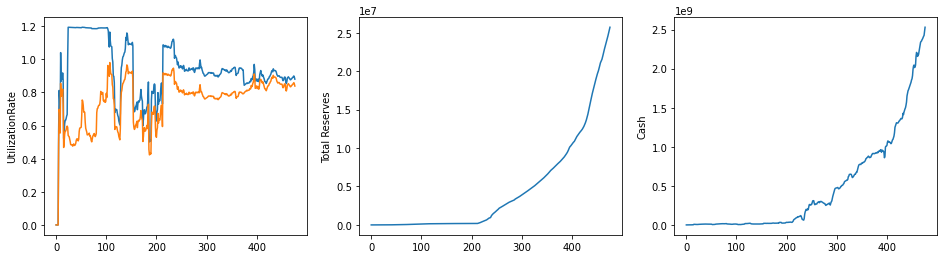

In [108]:
figsize(16,4)

plt.subplot(1,3,1)
plt.plot(UTD)
plt.plot(EUTD)
plt.ylabel('UtilizationRate')

plt.subplot(1,3,2)
plt.plot(TRD)
plt.ylabel('Total Reserves')

plt.subplot(1,3,3)
plt.plot(CD)
plt.ylabel('Cash')

plt.show()

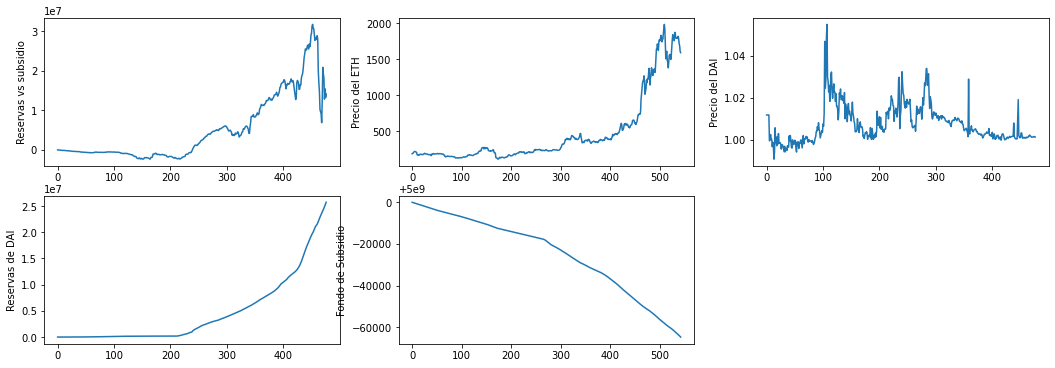

In [109]:
figsize(18,6)

earnings = []
for r in range(len(TRD)):
    earnings.append(TRD[r]*3*PRD[r]-(subsidy[0]-subsidy[r])*PR[r])
    
plt.subplot(2,3,1)
plt.plot(earnings)
plt.ylabel("Reservas vs subsidio")

plt.subplot(2,3,2)
plt.plot(PR)
plt.ylabel("Precio del ETH")

plt.subplot(2,3,3)
plt.plot(PRD)
plt.ylabel("Precio del DAI")

plt.subplot(2,3,4)
plt.plot(TRD)
plt.ylabel("Reservas de DAI")

plt.subplot(2,3,5)
plt.plot(subsidy)
plt.ylabel("Fondo de Subsidio")

plt.show()